In [6]:
import keras
from keras.utils import np_utils
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.preprocessing.image import array_to_img, img_to_array, list_pictures, load_img
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
import os
files=os.listdir('datasets/extended_scam/')
len(files)
# files[0]
# temp_img = load_img('./datasets/beauty_extended/{0}'.format(files[0]), target_size=(64,64))

9331

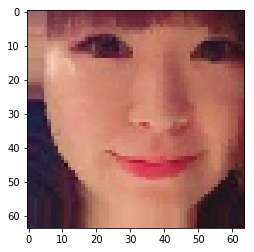

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(temp_img)

In [7]:
## 今動くやつ

with_files=os.listdir("./datasets/with_imgs/")
scam_files=os.listdir("./datasets/extended_scam/")

X=[]
Y=[]

for file in with_files:
    img=img_to_array(load_img('./datasets/with_imgs/{0}'.format(file),target_size=(64,64)))
    X.append(img)
    Y.append(0)
    
for file in scam_files:
    img=img_to_array(load_img('./datasets/extended_scam/{0}'.format(file),target_size=(64,64)))
    X.append(img)
    Y.append(1)

# arrayに変換
X = np.asarray(X)
Y = np.asarray(Y)

In [16]:
## forに入れていない 
X = []
Y = []
# 対象Aの画像
for picture in list_pictures('datasets/beauty_extended/'):
    img = img_to_array(load_img(picture, target_size=(64,64)))
    X.append(img)
    Y.append(0)
# 対象Bの画像
for picture in list_pictures('datasets/ugly_extended/'):
    img = img_to_array(load_img(picture, target_size=(64,64)))
    X.append(img)    
    Y.append(1)
# arrayに変換
X = np.asarray(X)
Y = np.asarray(Y)

In [18]:
len(X)

43236

In [28]:
#保留
Xtrain = []
Ytrain = []
# 対象Aの画像
for picture in list_pictures('./datasets/Train/class0/'):
    img = img_to_array(load_img(picture, target_size=(64,64)))
    Xtrain.append(img)
    Ytrain.append(0)
# 対象Bの画像
for picture in list_pictures('./datasets/Train/class1/'):
    img = img_to_array(load_img(picture, target_size=(64,64)))
    Xtrain.append(img)    
    Ytrain.append(1)
# arrayに変換
Xtrain = np.asarray(Xtrain)
Ytrain = np.asarray(Ytrain)
Xtrain = Xtrain.astype('float32')
Xtrain = Xtrain/255.0
Ytrain = np_utils.to_categorical(Ytrain, 2)

In [29]:
len(X_train)

0

In [23]:
#保留
Xtest = []
Ytest = []
# 対象Aの画像
for picture in list_pictures('./datasets/Test/class0/'):
    img = img_to_array(load_img(picture, target_size=(64,64)))
    Xtest.append(img)
    Ytest.append(0)
# 対象Bの画像
for picture in list_pictures('./datasets/Test/class1/'):
    img = img_to_array(load_img(picture, target_size=(64,64)))
    Xtest.append(img)    
    Ytest.append(1)
# arrayに変換
Xtest = np.asarray(Xtest)
Ytest = np.asarray(Ytest)
Xtest = Xtest.astype('float32')
Xtest = Xtest/255.0
Ytest = np_utils.to_categorical(Ytest, 2)

In [24]:
X_train, X_test, y_train, y_test=Xtrain,Xtest,Ytrain,Ytest

In [8]:
X = X.astype('float32')
X = X / 255.0
# クラスの形式を変換
Y = np_utils.to_categorical(Y, 2)
# 学習用データとテストデータ
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=111)

In [9]:
def scam_model():
    model=Sequential()
    
    model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=X_train.shape[1:]))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2))       # クラスは2個
    model.add(Activation('softmax'))
    
    return model

In [10]:
def train():
    model=scam_model()
    model.compile(loss='categorical_crossentropy',
                  optimizer=keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True),
                  metrics=['accuracy'])
    history = model.fit(X_train, y_train, batch_size=128, epochs=10,
                   validation_data = (X_test, y_test), verbose = 1)
    model.save_weights('extend_param.hdf5')
    model_json_str = model.to_json()
    open('extend_face_model.json', 'w').write(model_json_str)

In [11]:
def plot_hist(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['acc', 'val_acc'], loc='lower right')
    plt.show()

In [12]:
def test():
    # テストデータに適用
    predict_classes = model.predict_classes(X_test)
    # マージ。yのデータは元に戻す
    mg_df = pd.DataFrame({'predict': predict_classes, 'class': np.argmax(y_test, axis=1)})
    # confusion matrix
    pd.crosstab(mg_df['class'], mg_df['predict'])

In [13]:
train()

Train on 12046 samples, validate on 5934 samples
Epoch 1/10
12046/12046 [==============================] - 97s 8ms/step - loss: 0.5509 - acc: 0.7109 - val_loss: 0.4354 - val_acc: 0.8027
Epoch 2/10
12046/12046 [==============================] - 97s 8ms/step - loss: 0.3363 - acc: 0.8574 - val_loss: 0.4466 - val_acc: 0.7888
Epoch 3/10
12046/12046 [==============================] - 97s 8ms/step - loss: 0.2643 - acc: 0.8908 - val_loss: 0.2450 - val_acc: 0.8980
Epoch 4/10
12046/12046 [==============================] - 97s 8ms/step - loss: 0.2466 - acc: 0.8970 - val_loss: 0.2168 - val_acc: 0.9103
Epoch 5/10
12046/12046 [==============================] - 97s 8ms/step - loss: 0.2075 - acc: 0.9159 - val_loss: 0.1969 - val_acc: 0.9237
Epoch 6/10
12046/12046 [==============================] - 97s 8ms/step - loss: 0.1853 - acc: 0.9229 - val_loss: 0.1945 - val_acc: 0.9198
Epoch 7/10
12046/12046 [==============================] - 97s 8ms/step - loss: 0.1663 - acc: 0.9335 - val_loss: 0.1564 - val_acc:

In [19]:
predict_classes = model.predict_classes(X_test)
    # マージ。yのデータは元に戻す
mg_df = pd.DataFrame({'predict': predict_classes, 'class': np.argmax(y_test, axis=1)})
# confusion matrix
pd.crosstab(mg_df['class'], mg_df['predict'])

predict,0,1
class,,
0,2818,49
1,407,97


In [16]:
#モデルの読み込みと評価
from keras.models import model_from_json
model = model_from_json(open()'extend_face_model.json')
model.load_weights('extend_param.hdf5')
model.evaluate(X_test,y_test)

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [26]:
model_json_str = model.to_json()
open('scam_model.json', 'w').write(model_json_str)
model.save_weights('scam_weights.h5');

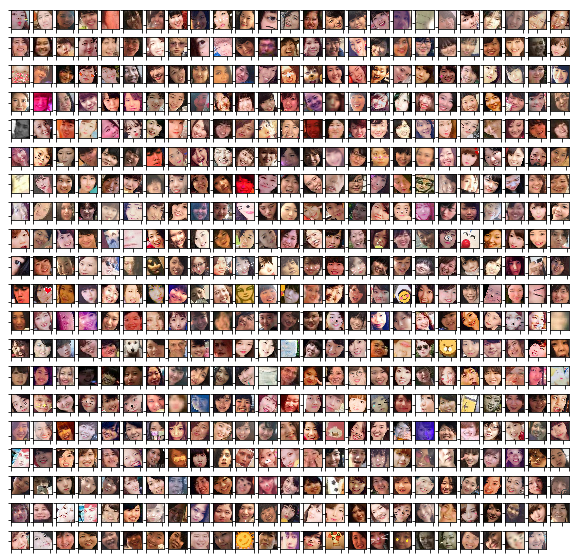

In [24]:
from PIL import Image
import os
%matplotlib inline
res_files=os.listdir('datasets/ugly_extended/')
images=[]
fig = plt.figure(figsize=(10, 10))
for i in range(500):
    images.append(np.array(Image.open('datasets/ugly_extended/'+res_files[i])))
for i in range(1, 500):
    plt.subplot(20, 25, i)
    plt.tick_params(labelbottom='off')
    plt.tick_params(labelleft='off')
    plt.imshow( images[i - 1] )

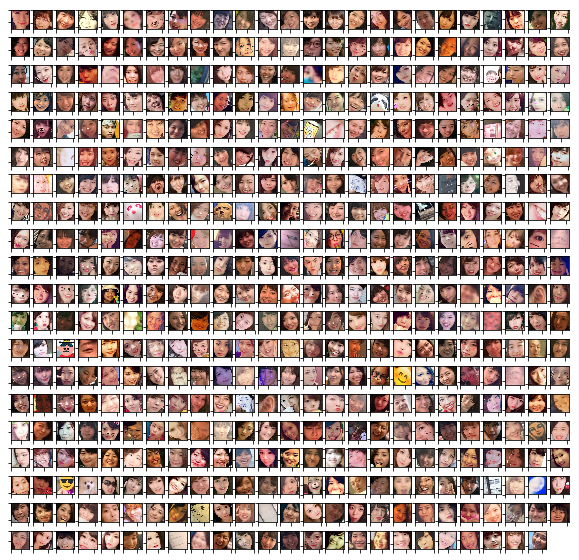

In [25]:
images=[]
res_files=os.listdir('datasets/beauty_extended/')
fig = plt.figure(figsize=(10, 10))
for i in range(500):
    images.append(np.array(Image.open('datasets/beauty_extended/'+res_files[i])))
for i in range(1, 500):
    plt.subplot(20, 25, i)
    plt.tick_params(labelbottom='off')
    plt.tick_params(labelleft='off')
    plt.imshow( images[i - 1] )